## Setup Colab

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
wdir = '/content/gdrive/Othercomputers/My MacBook Air/cell-jamming/experiment_a'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats.stats import pearsonr 
np.set_printoptions(linewidth=np.inf)

In [4]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


## Correlation as a function of t

In [13]:
figure_name = 'corr_t.png'

data_folder_name = 'data_extracted'
figures_dir = 'figures'
n_frames = 29

In [14]:
df = pd.read_csv(os.path.join(wdir, data_folder_name, 'grid_data.csv'))

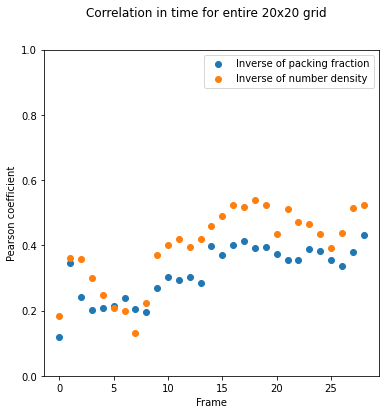

In [15]:
T = []
R_Phi = []
R_N = []

#plt.rcParams.update({'font.size': 22})

for i in range(0, n_frames):

  df_filtered = df[df['t'] == i]
  df_filtered = df_filtered.reset_index(drop=True)
  
  Phi = df_filtered['phi'].to_numpy()
  Phi_inv = 1/Phi
  U = df_filtered['u'].to_numpy()
  N = df_filtered['N'].to_numpy()
  N_inv = 1/N

  pearson_Phi = pearsonr(Phi_inv, U)[0]
  R_Phi.append(pearson_Phi)

  pearson_N = pearsonr(N_inv, U)[0]
  R_N.append(pearson_N)

  T.append(i)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Correlation in time for entire 20x20 grid')
ax.scatter(T, R_Phi, label='Inverse of packing fraction')
ax.scatter(T, R_N, label='Inverse of number density')
ax.set_xlabel('Frame')
ax.set_ylabel('Pearson coefficient')
ax.set_ylim(0,1)
ax.legend()
  
plt.show()
fig.savefig(os.path.join(wdir, figures_dir, figure_name))
plt.close(fig)

## Correlation as a function of x, y, t

In [8]:
video_name = 'corr_xyt'

data_folder_name = 'data_extracted'
videos_dir = 'videos/' + video_name
n_frames = 29

In [9]:
df = pd.read_csv(os.path.join(wdir, data_folder_name, 'grid_data.csv'))

In [10]:
def get_matrix(X,Y,U):

  def find_xy_ind(xval, yval, xarray, yarray):    
    for index in range(0, len(xarray)):
      if abs(xarray[index] - xval) < 0.0001 and abs(yarray[index] - yval) < 0.0001:
        return index

  X_unique=np.unique(X)
  Y_unique=np.unique(Y)

  matriz_final = np.empty([X_unique.shape[0], Y_unique.shape[0]])

  for i in range(X_unique.shape[0]):
    for j in range(Y_unique.shape[0]):
        xval = X_unique[i]
        yval = Y_unique[j]
        index = find_xy_ind(xval, yval, X, Y)
        matriz_final[i,j] = U[index]
  
  matriz_final = matriz_final.transpose()
  #matriz_final = np.flip(matriz_final, axis = 0)

  return matriz_final

In [11]:
old_n = 20
new_n = 10
frac = int(old_n/new_n)

for i in range(0, n_frames):
  number_str = str(i).zfill(3)

  img_name =  'frame' + number_str + '.png'

  df_filtered = df[df['t'] == i]
  df_filtered = df_filtered.reset_index(drop=True)

  U = df_filtered['u'].to_numpy()
  Phi = df_filtered['phi'].to_numpy()
  Phi_inv = 1/Phi
  X = df_filtered['x'].to_numpy()
  Y = df_filtered['y'].to_numpy()

  Phi_inv_matrix = get_matrix(X,Y,Phi_inv)
  U_matrix = get_matrix(X,Y,U)
  R_matrix = np.empty((new_n, new_n))

  for k in range(0, new_n):
    for j in range(0, new_n):
      initial_x = frac*k
      final_x = frac*(k+1)-1

      initial_y = frac*j
      final_y = frac*(j+1)-1

      Phi_inv_sub_matrix = Phi_inv_matrix[initial_x:final_x+1, initial_y:final_y+1]
      U_sub_matrix = U_matrix[initial_x:final_x+1, initial_y:final_y+1]

      Phi_vector = Phi_inv_sub_matrix.flatten()
      U_vector = U_sub_matrix.flatten()

      R_matrix[k,j] = pearsonr(Phi_vector, U_vector)[0]
      
  fig, ax = plt.subplots(1, 1, figsize=(6,6))
  fig.suptitle('Frame ' + number_str)
  plt.imshow(R_matrix, cmap='hot', interpolation='nearest', vmin = -1, vmax = 1, origin = 'upper')
  plt.colorbar()
  fig.savefig(os.path.join(wdir, videos_dir, img_name))
  plt.close(fig)

In [12]:
%cd {os.path.join(wdir, videos_dir)}
!ffmpeg -r 6 -i frame%03d.png -vcodec mpeg4 -y {video_name}.mp4

/content/gdrive/Othercomputers/My MacBook Air/cell-jamming/experiment_a/videos/corr_xyt
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-